<a href="https://colab.research.google.com/github/sanjana19991118/python_ml/blob/main/Discreatization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)


In [14]:
# loading the dataset
# store the dataset locally

bank_data = pd.read_csv("/content/bank.csv", sep=';')
# first 5 rows of the bank dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
# choosing the age column to perform binning
age_data = bank_data['age']

#check the minimum and maximum age to understand the range
print(age_data.min())
print(age_data.max())

19
87


In [16]:
# Equal Width Binning

bank_data['age_after_bin'] = pd.cut(age_data, bins=4, labels=['Young', 'Adult', 'Mature', ' Senior'])

bank_data[['age', 'age_after_bin']].head(10)

,age,age_after_bin
0,30,Young
1,33,Young
2,35,Young
3,30,Young
4,59,Mature
5,35,Young
6,36,Young
7,39,Adult
8,41,Adult
9,43,Adult


In [17]:
# Equal Frequency Binning
# Each bin has (~25% of data)

# This uses pd.qcut(), which splits data based on percentiles(quatiles here)
# This ensures that each bin has a roughly equal number of people
bank_data['age_after_bin_freq'] = pd.qcut(age_data, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

bank_data[['age', 'age_after_bin', 'age_after_bin_freq']].head(10)



,age,age_after_bin,age_after_bin_freq
0,30,Young,Q1
1,33,Young,Q1
2,35,Young,Q2
3,30,Young,Q1
4,59,Mature,Q4
5,35,Young,Q2
6,36,Young,Q2
7,39,Adult,Q2
8,41,Adult,Q3
9,43,Adult,Q3


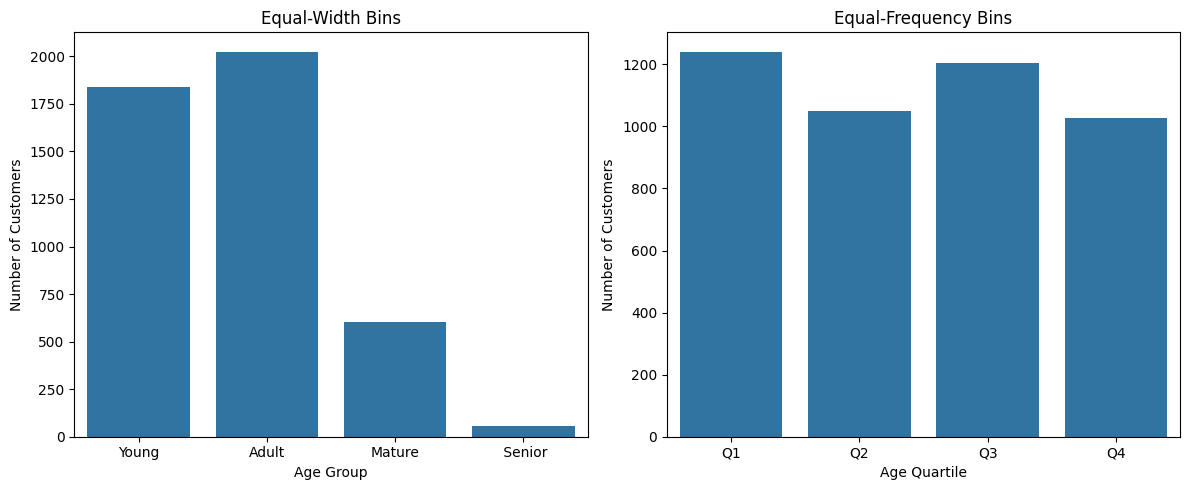

In [22]:
# Visualize the distribution of age bins using bar plots

# We'll create side-by-side plots to compare both binning methods

# Set up a 1-row, 2-column subplot
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_after_bin', data=bank_data, ax=axes[0])
axes[0].set_title('Equal-Width Bins')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Customers')

sns.countplot(x='age_after_bin_freq', data=bank_data, ax=axes[1])
axes[1].set_title('Equal-Frequency Bins')
axes[1].set_xlabel('Age Quartile')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


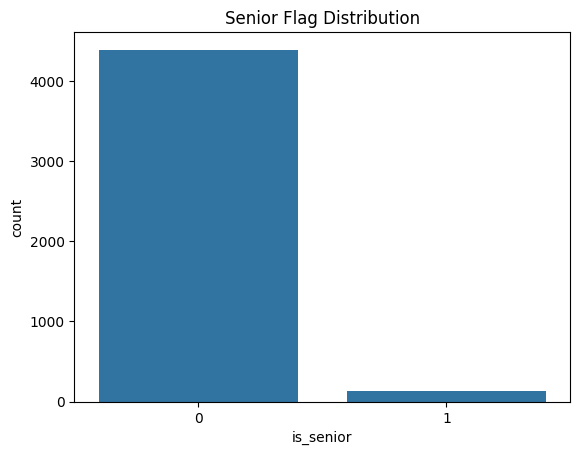

In [23]:
# Binarization Goal: Create a binary flag is_senior if age > 60
bank_data['is_senior'] = (bank_data['age'] > 60).astype(int)

# view distribution
sns.countplot(x='is_senior', data=bank_data).set_title('Senior Flag Distribution')
plt.show()


In [ ]:
# Summary
# Discreatization is the process of converting continous data into discreate categories or intervals
# we group raw data into range of ages ( young, middle aged, senior )